## Final Data Cleaning

For this sprint, I revistied and cleaned up some of the steps I have done for the data cleaning in my previous sprint, finishd grouping the CommonName by tropic levels and freshwater vs. saltwater, removed duplicates, assigned numeric null value based on species groups, converted unit values, and rearranged analytes data frames.

Another point to note is that initially I performed the data cleaning on the full dataset instead of the 20% sample.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #just to makes sure all columns are visible


In [2]:
df2 = pd.read_csv('Tissue_dataset_2019_2023.csv', low_memory=False)

In [3]:
df2.shape 

(216797, 117)

### Preliminary Columns Exploration

Some of the key information I could pick up from the headers are:
- CommonName(Species)
- Analytes(Chemicals)
- Result(Analytes results)
- StationName(Locations)
- Latitude, Longitude

These are key informations to have since the analysis is mainly focused on the levels of harmful chemical presence in which species and at what location

In [4]:
df2.shape

(216797, 117)

In [5]:
null_counts = df2.isnull().sum().sum()
null_counts

3943668

In [6]:
counts = df2.count().sum() #total value counts in dataframe
counts

21421581

In [7]:
null_counts/(counts+null_counts)*100 # total amounts of values in DF


15.54752330639451

Next I want to look into our three most important columns - CommonName, Analyte, & StationName to get a sense of what kind of general group would be needed

In [8]:
df2['Analyte'].nunique()

644

In [9]:
df2['CommonName'].nunique()

97

In [10]:
df2['StationName'].nunique()

220

### Data Cleaning - Dropping Columns

To begin data cleaning, I am looking at columns that I can drop. Couple reasons for doing this is:

1) If I drop columns that are not needed for analysis and contains lots of null values, that would take care of some of the null values we see above

2) It condenses the dataframe into a more managable size for my computer to handle


Since I mainly want to focus on correlations between analyte, species, and location, I can drop a lot of fields that are unrelated to those values. The data that we want to focus on is the field data, not the lab research methods data. 

Dictionary of columns could be found here: https://data.ca.gov/dataset/surface-water-aquatic-organism-tissue-sample-results/resource/206da2ff-70f2-4f56-aacc-2a39ef3bf15b

Data that is not core for the purpose of this analysis would be: 
- Tissue sample preparation methods
- Internal codes used for agency reporting
- Columns that are all nulls
- Comments regarding lab analysis methods
- Project agencies information

Columns about sample prep methods:      
TissuePrep,Matrix,Method,DilutionFactor,PrepPreservationName,PrepPreservationDate,DigestExtractMethod,DigestExtractDate,AnalysisDate,CompositeTissuePrep,CollectionMethodName,CollectionDeviceName,LengthSource,WeightSource,Datum,MDL,RL,CollectionTime

Columns containing internal compliance/quality codes: QACode,QACode,BatchVerification,ComplianceCode,LabSubmissionCode,GroupSample,HydroModLoc,TagNumber,CompositeRowID,PersonnelCode,DWC_AnalyteWFraction,ResQualCode

Columns that are mostly null and does not pertain critical information: ResultComments,CompositeJunctionRowID,SizeDescr,SampleID

Columns that are comments regarding lab analysis methods: LabBatchComments,CompositeComments,ProcessedOrganismsExpandedComments,PartsComments,SampleComments,TissueCollectionComments,LocationDetailTIComments,DataQuality,DataQualityIndicator

Columns about agencies: CompAgency,AnalyzingAgency,SubmittingAgency,CompositeParentProjectName,CompositeProjectCode,CompositeProjectName,SamplingAgency,ProgramName,ParentProjectName,ProjectCode


In [11]:
drop_list = ['TissuePrep',
 'Matrix',
 'Method',
 'QACode',
 'BatchVerification',
 'ComplianceCode',
 'DilutionFactor',
 'ResultComments',
 'PrepPreservationName',
 'PrepPreservationDate',
 'DigestExtractMethod',
 'DigestExtractDate',
 'AnalysisDate',
 'CompositeComments',
 'LabBatch',
 'LabBatchComments',
 'AnalyzingAgency',
 'SubmittingAgency',
 'LabSubmissionCode',
 'LatestDateSampled',
 'SampleDateRange(Days)',
 'SampleDate',
 'CollectionTime',
 'CompositeParentProjectName',
 'CompositeProjectCode',
 'CompositeProjectName',
 'CompositeSampleDate',
 'CompositeProgramName',
 'CompositeTissuePrep',
 'SamplingAgency',
 'GroupSample',
 'ProtocolCode',
 'LocationCode',
 'HydroModLoc',
 'Hydromod',
 'CollectionMethodName',
 'CollectionDeviceName',
 'TagNumber',
 'LengthSource',
 'WeightSource',
 'Anomaly',
 'ProcessedOrganismsExpandedComments',
 'PartsComments',
 'CompAgency',
 'CompositeRowID',
 'PersonnelCode',
 'SampleComments',
 'TissueCollectionComments',
 'LocationDetailTIComments',
 'CompositeJunctionRowID',
 'DWC_AnalyteWFraction',
 'DataQuality',
 'DataQualityIndicator',
 'Datum',
 'SizeDescr',
 'ResQualCode',
 'MDL',
 'RL',
 'ProgramName',
 'ParentProjectName',
 'ProjectCode',
 'SampleID']

len(drop_list)

62

In [12]:
df2 = df2.drop(columns = drop_list)


In [13]:
df2.shape 

(216797, 55)

Next, I will look at columns that could hold duplicate information. These columns look like good candidates to example since their headers are almost the same, except one is information on the composite. A composite is when researchers take tissues of multiple critters from the same species in the same location within a small timeframe, and combine them into a single sample to analyze. Lots of times this method is used to analyze smaller organisms such as clams. It is very likely that these columns hold same information.

In [14]:
#set 1 is the column to keep
set_1 = ['CompositeID',
 'StationName',
 'StationCode',
 'Latitude',
 'Longitude',
 'CompositeType',
 'CommonName',
 'FinalID',
 'TissueName',
 'SampleTypeCode',
 'CompositeReplicate',
 'GeometryShape']

#set 2 is the columns to drop is it contains duplicated values as columns in set 1
set_2 = ['CompositeCompositeID',
 'CompositeStationName',
 'CompositeStationCode',
 'CompositeLatitude',
 'CompositeLongitude',
 'CompositeCompositeType',
 'CompositeCommonName',
 'CompositeFinalID',
 'CompositeTissueName',
 'CompositeSampleTypeCode',
 'CollectionReplicate',
 'CompositeGeometryShape']

print(len(set_1), len(set_2))

12 12


In [15]:
for i in range(len(set_1)): # range function iterates down the length of list
    compare1 = df2[set_1[i]].isin(df2[set_2[i]]) # compares values of columns in set 1 to values of columns in set 2
    print(compare1.value_counts())


CompositeID
True    216797
Name: count, dtype: int64
StationName
True    216797
Name: count, dtype: int64
StationCode
True    216797
Name: count, dtype: int64
Latitude
False    183421
True      33376
Name: count, dtype: int64
Longitude
False    209878
True       6919
Name: count, dtype: int64
CompositeType
True    216797
Name: count, dtype: int64
CommonName
True    216797
Name: count, dtype: int64
FinalID
True    216797
Name: count, dtype: int64
TissueName
True    216797
Name: count, dtype: int64
SampleTypeCode
True    216797
Name: count, dtype: int64
CompositeReplicate
True    216797
Name: count, dtype: int64
GeometryShape
True    216797
Name: count, dtype: int64


In [16]:
# I removed 'CompositeStationCode' and 'CompositeLatitude'from the drop list since they are showing false matches with the latitude & longitude columns
drop_set_2 = ['CompositeCompositeID',
 'CompositeStationName',
 'CompositeStationCode',
 'CompositeCompositeType',
 'CompositeCommonName',
 'CompositeFinalID',
 'CompositeTissueName',
 'CompositeSampleTypeCode',
 'CollectionReplicate',
 'CompositeGeometryShape']
df2 = df2.drop(columns = drop_set_2) # I can now drop these


I find it curious that the longitude & latitdue columns are returning some false matches because the StationName for both non-composite and composite samples are the same. It could be some keying errors causing that issue. It is worth it to investigate later on.

In [17]:
df2.shape # the columns in set 2 are dropped

(216797, 45)

For this particular column, FinalID, I have a feeling that it is holding the scientific name for the CommonName. To further prove it, I grouped the dataset by the CommonName to see how many unique values of FinalID would show up. It is a 1:1 relationship.

In [18]:
df2.groupby(['CommonName'])['FinalID'].unique() #CommonName & FinalID actually shows same information, FinalID is just the scientific name

CommonName
Asiatic Clam                       [Potamocorbula amurensis]
Barred Sand Bass                      [Paralabrax nebulifer]
Barred Surfperch                    [Amphistichus argenteus]
Bat Ray                             [Myliobatis californica]
Black Crappie                       [Pomoxis nigromaculatus]
                                           ...              
Yellow shore crab                  [Hemigrapsus oregonensis]
Yellowfin Croaker                         [Umbrina roncador]
Yellowtail Rockfish                      [Sebastes flavidus]
Zebra Perch                              [Hermosilla azurea]
Zooplankton (un-identified)    [Zooplankton (un-identified)]
Name: FinalID, Length: 97, dtype: object

In [19]:
df2 = df2.drop(columns = ['FinalID']) # I can now drop these

In [20]:
df2.shape

(216797, 44)

### Data Cleaning - Measurement Units Unification

Next, I am looking at the columns that hold the measurement unit to see what's in there. I have noticed that for all the mass measurements, the measurement unit is embedded within the column head, i.e.  WeightAvg(g). This gives me a feeling that there are numeric results that represents different measurement unit values.

In [21]:
#taking a look at the unit columns to see what kind of info there is

unit = ['Unit','UnitLengthFish','UnitWeightFish','UnitTissueWeight','UnitCompositeWeight']

for col in range(len(unit)):
    print(df2[unit[col]].value_counts())

Unit
ng/g ww       76743
ug/Kg ww      57120
% recovery    23591
ug/g ww       22511
%             20916
ng/g dw        6151
ug/Kg dw       3544
ug/g dw        3013
yr             1833
% ww            985
pg/g dw         322
mg/Kg dw         47
mg/Kg ww         21
Name: count, dtype: int64
UnitLengthFish
mm    159372
cm       366
Name: count, dtype: int64
UnitWeightFish
g    159209
Name: count, dtype: int64
UnitTissueWeight
g    216797
Name: count, dtype: int64
UnitCompositeWeight
g    216797
Name: count, dtype: int64


All the weight unit columns are in g, I can concatentate the unit into the results header

In [22]:
df2= pd.concat([df2, df2.rename(columns={'OrganismWeight': 'OrganismWeight(g)', 'TissueWeight': 'TissueWeight(g)', 'CompositeWeight': 'CompositeWeight(g)'}, inplace=True)])


In [23]:
df2 = df2.drop(columns = ['UnitWeightFish','UnitTissueWeight','UnitCompositeWeight'])

# I can now drop these since these columns have single units and can be indicated in the headers themselves

Now I want to look into converting ForkLength,TotalLength mm values to cm

In [24]:
df2.groupby(['UnitLengthFish'])['TotalLength'].unique() # we see there are 4 unique values in cm. We want to change them to mm

UnitLengthFish
cm                               [10.6, 10.0, 8.8, 9.5]
mm    [84.0, 75.0, 73.0, 72.0, 61.0, 60.0, 70.0, 110...
Name: TotalLength, dtype: object

In [25]:
df2.groupby(['UnitLengthFish'])['ForkLength'].unique() #also checking the ForkLength column, cm is all nulls, we will deal with them later

UnitLengthFish
cm                                                [nan]
mm    [-88.0, 134.0, 130.0, 122.0, 106.0, 102.0, 104...
Name: ForkLength, dtype: object

In [26]:
#making temp df to store rows for where UnitLengthFish = cm
convert_df = df2[(df2['UnitLengthFish']=='cm')]


In [27]:
convert_df['TotalLength'].value_counts() #capturing the original values

TotalLength
10.0    118
10.6    110
8.8      69
9.5      69
Name: count, dtype: int64

In [28]:
convert_df.loc[:,'TotalLength'] = (convert_df.loc[ :,'TotalLength']/10) # take all of that column values and divide by 10
convert_df.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,LabSampleID,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,OrganismID,TotalCount,ForkLength,TotalLength,OrganismWeight(g),UnitLengthFish,Age,Sex,TissueID,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm)
140151,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Acenaphthylene,ug/Kg ww,NaN,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",E9D9E947-B325-436D-8A1B-FDB1266522DC,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,cm,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6
140152,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Acenaphthylene,ug/Kg ww,NaN,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",6A88ACD2-5796-4626-9DB5-56E3408DD489,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,cm,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6
140153,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Anthracene,ug/Kg ww,NaN,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",AFE34DAC-DA9A-48FB-BC50-499EDED604DA,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,cm,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6
140154,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Anthracene,ug/Kg ww,NaN,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",B8B6CB1F-8A74-4BCD-8DC8-DF6BC449A3A2,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,cm,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6
140155,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,Benz(a)anthracene,ug/Kg ww,NaN,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",89253F43-76CB-495D-9FF9-F0FC81442D12,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,cm,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6


In [29]:
convert_df['TotalLength'].value_counts() # this checks out to what was showing before the conversion

TotalLength
1.00    118
1.06    110
0.88     69
0.95     69
Name: count, dtype: int64

Next, I am converting the UnitLengthFish columns all to "mm"

In [30]:
convert_df.loc[:,'UnitLengthFish'] = convert_df.loc[ :,'UnitLengthFish'] ='mm' #also changing the cm values in the UnitLengthFish to mm

In [31]:
convert_df['UnitLengthFish'].unique() #check

array(['mm'], dtype=object)

Now making a temp df for all the UnitLengthFish != cm rows to stitch the two back together to update df2

In [32]:
mm_df = df2[(df2['UnitLengthFish']!='cm')]

In [33]:
mm_df.shape

(216431, 41)

In [34]:
convert_df.shape

(366, 41)

In [35]:
df2 = pd.concat([convert_df,mm_df])

In [36]:
df2.shape  # shape is the same as before

(216797, 41)

In [37]:
df2.groupby(['UnitLengthFish'])['TotalLength'].unique() # all values are now in mm

UnitLengthFish
mm    [1.06, 1.0, 0.8800000000000001, 0.95, 84.0, 75...
Name: TotalLength, dtype: object

We can now also update the TotalLength header name and drop UnitLengthFish like we did with others

In [38]:
df2= pd.concat([df2, df2.rename(columns={'TotalLength': 'TotalLength(mm)'}, inplace=True)])


In [39]:
df2 = df2.drop(columns = ['UnitLengthFish'])

The last measure unit I need to look into is the "Unit" column next to the Results columns. That will tell me if the numberic values under the "Result" column has a unified meaning.

In [40]:
#creating temp dataframe to store rows where column result is showing null
results_null = df2.loc[df2['Result'].isnull()]

In [41]:
results_null['Analyte'].value_counts()

Analyte
Selenium              3100
PCB 169                934
PCB 126                821
Aldrin                 810
Heptachlor Epoxide     804
                      ... 
PCB 091                  2
Age                      2
PCB 135/151/154          1
PBDE 119                 1
PCB 045                  1
Name: count, Length: 403, dtype: int64

##### Group Analytes

I want to group all different PCBs and PBDEs together in order to reduce the number for features, as well as to unify the unit of measurements under the "Result" column.

For more information on PCBs: https://www.epa.gov/pcbs/learn-about-polychlorinated-biphenyls#:~:text=PCBs%20are%20a%20group%20of,industrial%20and%20commercial%20applications%20including:

For more information on PBDEs https://www.epa.gov/assessing-and-managing-chemicals-under-tsca/polybrominated-diphenyl-ethers-pbdes


In [42]:
df2['Analyte'].unique()

array(['Acenaphthylene', 'Anthracene', 'Benz(a)anthracene',
       'Benzo(a)pyrene', 'Benzo(b)fluoranthene', 'Benzo(g,h,i)perylene',
       'Benzo(k)fluoranthene', 'Chlordane, cis-', 'Chlordane, trans-',
       'Chrysene', "DDD(o,p')", "DDD(p,p')", "DDE(o,p')", "DDE(p,p')",
       "DDT(o,p')", 'Dibenz(a,h)anthracene', 'Fluorene',
       'Indeno(1,2,3-c,d)pyrene', 'Nonachlor, cis-', 'Nonachlor, trans-',
       'Oxychlordane', 'PCB 018', 'PCB 028', 'PCB 037', 'PCB 049',
       'PCB 052', 'PCB 070', 'PCB 074', 'PCB 077', 'PCB 081', 'PCB 087',
       'PCB 099', 'PCB 105', 'PCB 110', 'PCB 114', 'PCB 119', 'PCB 123',
       'PCB 126', 'PCB 138/158', 'PCB 149', 'PCB 151', 'PCB 156',
       'PCB 157', 'PCB 167', 'PCB 168', 'PCB 169', 'PCB 177', 'PCB 180',
       'PCB 183', 'PCB 189', 'PCB 194', 'PCB 206', 'Phenanthrene',
       'Pyrene', 'Lipid', 'PCB 101', 'PCB 118', 'PCB 128', 'PCB 170',
       'PCB 187', "DDT(p,p')", 'Dieldrin', 'HCH, gamma-', 'Heptachlor',
       'Heptachlor Epoxide', 'PCB

In [43]:
mask = df2['Analyte'].str.contains('PCB')
df2.loc[mask, 'Analyte'] = 'PCB'
df2['Analyte'].value_counts()

Analyte
PCB                         109821
Moisture                     19663
Mercury                      10732
Selenium                      8719
Terphenyl-d14(Surrogate)      2649
                             ...  
PBDE 181                         7
PBDE 166                         7
PBDE 015(Surrogate)              7
PBDE 154(Surrogate)              7
Mirex(Surrogate)                 7
Name: count, Length: 285, dtype: int64

In [44]:
mask2 = df2['Analyte'].str.contains('PBDE')
df2.loc[mask2, 'Analyte'] = 'PBDE'
df2['Analyte'].value_counts()

Analyte
PCB                             109821
Moisture                         19663
PBDE                             18619
Mercury                          10732
Selenium                          8719
                                 ...  
DDT(p,p')(Surrogate)                 7
DDT(o,p')(Surrogate)                 7
DDE(p,p')(Surrogate)                 7
DDE(o,p')(Surrogate)                 7
Chlordane, trans-(Surrogate)         7
Name: count, Length: 211, dtype: int64

In [45]:
Other = ~df2['Analyte'].str.contains('PCB|PBDE|Mercury|Moisture|Selenium')
df2.loc[Other, 'Analyte'] = 'Other'
df2['Analyte'].value_counts()
# There is no meaningful way to group the rest of these analytes since each of them has such a small sample size (>100)

Analyte
PCB                109821
Other               48412
Moisture            19663
PBDE                18619
Mercury             10732
Selenium             8719
Mercury, Methyl       831
Name: count, dtype: int64

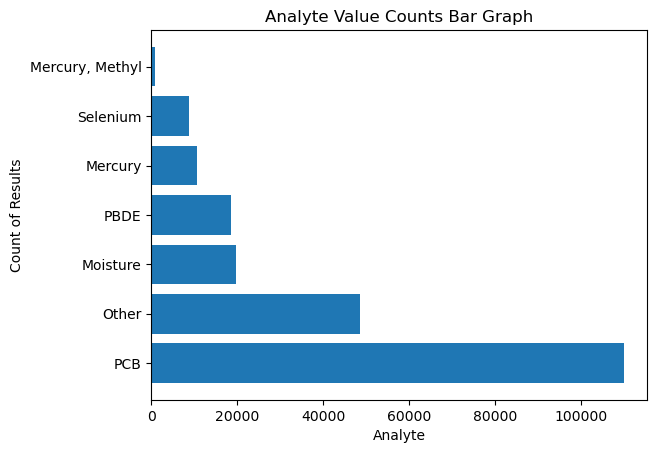

In [46]:
import matplotlib.pyplot as plt

value_counts = df2['Analyte'].value_counts()

plt.barh(value_counts.index, value_counts.values)
plt.xlabel('Analyte')
plt.ylabel('Count of Results')
plt.title('Analyte Value Counts Bar Graph')
plt.show()

##### Looking a nulls with in Result since we are here

In [47]:
results_null2 = df2.loc[df2['Result'].isnull()]
results_null2['Analyte'].value_counts(normalize= True)

Analyte
PCB                0.598237
Other              0.264795
PBDE               0.102316
Selenium           0.033854
Moisture           0.000382
Mercury            0.000349
Mercury, Methyl    0.000066
Name: proportion, dtype: float64

I am a little concerned about how many unique instances of PCB observed. I have no idea if it is reality that's being presented , or if something is skewing the data class. This is where the EDA about regarding the duplicate rows could answer. Also, as shown below, 50% of the PCB values are null. With what we have mentioned before, since null values could mean no records or not measured, I am going to set all nulls to 0.

In [48]:
df2['Result'] = df2['Result'].fillna(value=0)

Since I am only concerned about measuring PCB, PBDE, and Mercury, I am going to drop all the rows of all other analytes

In [49]:
df2.drop(df2[df2['Analyte'].str.contains('Other|Moisture|Selenium|Methyl')].index,inplace=True)
df2['Analyte'].value_counts()

Analyte
PCB        109821
PBDE        18619
Mercury     10732
Name: count, dtype: int64

In [50]:
df2['Analyte'].value_counts()

Analyte
PCB        109821
PBDE        18619
Mercury     10732
Name: count, dtype: int64

In [51]:
df2.shape

(139172, 40)

##### Transform Result Columns to Each Analyte Result Columns

In [52]:
PCB = df2[df2['Analyte'] == 'PCB'] 
PCB.loc[:,'PCBResult']= PCB.loc[:,'Result']
PCB['Result'].sum()==PCB['PCBResult'].sum()

/var/folders/rr/4wp1syc10818wgtwwcq7_nvw0000gn/T/ipykernel_76433/1516743066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCB.loc[:,'PCBResult']= PCB.loc[:,'Result']


True

In [53]:
PBDE = df2[df2['Analyte'] == 'PBDE'] 
PBDE.loc[:,'PBDEResult']= PBDE.loc[:,'Result']
PBDE['Result'].sum()==PBDE['PBDEResult'].sum()

/var/folders/rr/4wp1syc10818wgtwwcq7_nvw0000gn/T/ipykernel_76433/2655076624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PBDE.loc[:,'PBDEResult']= PBDE.loc[:,'Result']


True

In [54]:
Mercury = df2[df2['Analyte'] == 'Mercury'] 
Mercury.loc[:,'MercuryResult']= Mercury.loc[:,'Result']
Mercury['Result'].sum()==Mercury['MercuryResult'].sum()

/var/folders/rr/4wp1syc10818wgtwwcq7_nvw0000gn/T/ipykernel_76433/151172494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mercury.loc[:,'MercuryResult']= Mercury.loc[:,'Result']


True

In [55]:
df2 = pd.concat([PCB,Mercury,PBDE])
df2.shape

(139172, 43)

In [56]:
df2.groupby('Analyte')['Unit'].value_counts()

Analyte  Unit      
Mercury  ug/g ww       10409
         ug/g dw         309
         ng/g dw           7
         ng/g ww           7
PBDE     ng/g ww       11196
         % recovery     3661
         ng/g dw        3440
         pg/g dw         322
PCB      ug/Kg ww      54249
         ng/g ww       41267
         % recovery    11074
         ug/Kg dw       3231
Name: count, dtype: int64

In [57]:
#dw means dry weight... the rest of the measurement units are in wet weight, there is no variables here to help convert dry weight to wet weight, best to drop samples
#Surrogate recovery results use a unit of "%". Toxicity test results are recorded as percent that survived ("%").Surrogate recovery is the amount of a pure compound or element that is extracted and measured after being added to a test material as a spike
df2.drop(df2[df2['Unit']== '% recovery'].index,inplace=True)
df2.drop(df2[df2['Unit']== 'ng/g dw'].index,inplace=True)
df2.drop(df2[df2['Unit']== 'ug/Kg dw'].index,inplace=True)

In [58]:
df2.groupby('Analyte')['Unit'].value_counts()

Analyte  Unit    
Mercury  ug/g ww     10409
         ug/g dw       309
         ng/g ww         7
PBDE     ng/g ww     11196
         pg/g dw       322
PCB      ug/Kg ww    54249
         ng/g ww     41267
Name: count, dtype: int64

In [59]:
df2.replace('ug/Kg ww','ng/g ww', inplace=True)
df2.groupby('Analyte')['Unit'].value_counts()

#the conversion between ug/Kg ww and ng/g ww is 1:1

Analyte  Unit   
Mercury  ug/g ww    10409
         ug/g dw      309
         ng/g ww        7
PBDE     ng/g ww    11196
         pg/g dw      322
PCB      ng/g ww    95516
Name: count, dtype: int64

In [60]:
df2.loc[df2['Unit']== 'ug/g ww','MercuryResult'] = df2.loc[df2['Unit']== 'ug/g ww','MercuryResult']/1000
df2.loc[df2['Unit']== 'ug/g ww','Result'] = df2.loc[df2['Unit']== 'ug/g ww','Result']/1000
#1000 ug/g ww' = 1 ng/g ww

In [61]:
check = df2.loc[df2['Unit']== 'ug/g ww','Result'] == df2.loc[df2['Unit']== 'ug/g ww','MercuryResult']
check.value_counts()

True    10409
Name: count, dtype: int64

In [62]:
df2.replace('ug/g ww','ng/g ww', inplace=True) #updated unit after conversion
df2.groupby('Analyte')['Unit'].value_counts()

Analyte  Unit   
Mercury  ng/g ww    10416
         ug/g dw      309
PBDE     ng/g ww    11196
         pg/g dw      322
PCB      ng/g ww    95516
Name: count, dtype: int64

In [63]:
df2.rename(columns={'MercuryResult': 'MercuryResult(ng/g ww)','PCBResult': 'PCBResult(ng/g ww)','PBDEResult': 'PBDEResult(ng/g ww)'}, inplace=True)

In [64]:
df2.head()

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,NumberFishperComp,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,LabSampleID,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),CompSizeCheck,SexSummary,TissueResultRowID,CompositeLatitude,CompositeLongitude,OrganismID,TotalCount,ForkLength,TotalLength(mm),OrganismWeight(g),Age,Sex,TissueID,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm),PCBResult(ng/g ww),MercuryResult(ng/g ww),PBDEResult(ng/g ww)
140193,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",439107A5-DF06-4F18-A3A1-DEFE91EA1B72,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,NaN,NaN
140194,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",E59C2843-198F-4492-80BC-7261BB186EA1,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,NaN,NaN
140195,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",7F351E75-BA55-4A6A-A717-7A5AB749BEEA,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,NaN,NaN
140196,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",27CF3794-4FBD-455F-93FE-E60E7512813B,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,NaN,NaN
140197,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,26.0,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,NaN,10.6,10.6,100.0,"Unk (26), M (0), F (0)",08342AD5-F915-4687-8C21-C338F8AB629A,33.7716,-118.133,F1-190709,26.0,NaN,1.06,-88.0,NaN,Unk,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,NaN,NaN


In [65]:
df2.shape

(117759, 43)

### Data Cleaning - Duplicates & Null Values

Now I explore the null values to understand what is the best way to process them. First I drop the duplicated columns 

In [66]:
df2.duplicated().sum()

0

In [67]:
df2.duplicated().mean() #about 15% of the data is dups

0.0

In [68]:
df2.drop_duplicates(inplace=True)

In [69]:
df2.duplicated().sum()

0

Now looking at the null values...

In [70]:
df2.isna().sum()

ProjectName                    0
CompositeID                    0
StationName                    0
StationCode                    0
Latitude                       0
Longitude                      0
GeometryShape               7688
EarliestDateSampled            0
CompositeType                  0
CommonName                     0
TissueName                     0
NumberFishperComp              7
SampleTypeCode                 0
CompositeReplicate             0
ResultReplicate                0
Analyte                        0
Unit                           0
Result                         0
LabSampleID                    0
OrganismGroup                  0
WeightAvg(g)               27793
TLMax(mm)                  27413
TLAvgLength(mm)            27413
CompSizeCheck              27413
SexSummary                     7
TissueResultRowID              0
CompositeLatitude              0
CompositeLongitude             0
OrganismID                     0
TotalCount                     7
ForkLength

In [71]:
df2.isna().mean()*100

ProjectName                0.000000
CompositeID                0.000000
StationName                0.000000
StationCode                0.000000
Latitude                   0.000000
Longitude                  0.000000
GeometryShape              6.528588
EarliestDateSampled        0.000000
CompositeType              0.000000
CommonName                 0.000000
TissueName                 0.000000
NumberFishperComp          0.005944
SampleTypeCode             0.000000
CompositeReplicate         0.000000
ResultReplicate            0.000000
Analyte                    0.000000
Unit                       0.000000
Result                     0.000000
LabSampleID                0.000000
OrganismGroup              0.000000
WeightAvg(g)              23.601593
TLMax(mm)                 23.278900
TLAvgLength(mm)           23.278900
CompSizeCheck             23.278900
SexSummary                 0.005944
TissueResultRowID          0.000000
CompositeLatitude          0.000000
CompositeLongitude         0

#### Categorical Column Nulls

I will first look at the categorical columns since there are less of them

###### Geometry Shape

In [72]:
df2['GeometryShape'].value_counts()


GeometryShape
PolygonCent     60964
Point           41426
Polygon          6837
Not Provided      636
PointCent         182
point              26
Name: count, dtype: int64

In [73]:
# I can just fill in nulls with 'Not Provided'
df2['GeometryShape'] = df2['GeometryShape'].fillna('Not Provided')
df2['GeometryShape'].value_counts()

GeometryShape
PolygonCent     60964
Point           41426
Not Provided     8324
Polygon          6837
PointCent         182
point              26
Name: count, dtype: int64

###### Age

In [74]:
df2['Age'].value_counts()
# this column is mono valued, meaning it doesn't give us any valuable info, drop it

Age
NR    87578
Name: count, dtype: int64

In [75]:
df2= df2.drop('Age',axis=1)

###### Sex Column

In [76]:
df2['Sex'].value_counts()


Sex
LAB    61361
M       9559
F       9298
NR      7405
Unk     1321
Name: count, dtype: int64

In [77]:
df2['Sex'] = df2['Sex'].fillna('NR')


In [78]:
#NR = Not Recorded & UNk = Unknown, we can combine these, and then put the nulls into Not Recorded

sex = df2['Sex'].str.contains('Unk')
df2.loc[sex, 'Sex'] = 'NR'

#Both the values LAB & NR are unknown sexes, LAB means they are still in the lab, unidentified, needs to be grouped into NR
sex2 = df2['Sex'].str.contains('LAB')
df2.loc[sex2, 'Sex'] = 'NR'
df2['Sex'].value_counts()

Sex
NR    98902
M      9559
F      9298
Name: count, dtype: int64

Both the values LAB & NR are unknown sexes, LAB means they are still in the lab, unidentified, needs to be grouped into NR

#### Numerical Columns Nulls

Now I will look at the numeric columns. Before looking into the numeric column null values, I need to reduce the number of features in the common name in order to make a more meaningful analysis. After doing extensive research, chemicals bioaccumulates exponentially up through the tropic levels. Forage fish are the primary consumers that serves as a stable food source for all larger species. They tend to feed on very small organisms. As a result, presences of contaminanes in forage fish would be a significant indicator of the severity of bioaccumulation up the trophic levels. If the chemical presence in forage fish is elevated, it would indicate that the environment is significantly impacted. They serve as a pivotal link between generally or microscopic organisms.

##### Group Species
The way that makes the most sense to group them is by 1) Freshwater vs Saltwater Species, 2) Trophic levels. According to research, the trophic levels for my set of organisms are the following:
* Freshwater Filter Feeders
* Freshwater Primary Consumer Forage
* Freshwater Omnivores Forage
* Freshwater Omnivores
* Freshwater Piscivores
* Freshwater Top Predators
* Saltwater Filter Feeders
* Saltwater Primary Consumer Forage
* Saltwater Omnivores
* Saltwater Piscivores Forage
* Saltwater Piscivores
* Saltwater Top Predators
* Primary Consumers


In [79]:
df2['CommonName'].nunique()

87

In [80]:
df2['CommonName'].unique()

array(['Top Smelt', 'Tilapia spp.', 'Flathead Catfish', 'Channel Catfish',
       'Largemouth Bass', 'Common Carp', 'Bluegill', 'Rainbow Trout',
       'Blue Catfish', 'Barred Surfperch', 'Northern Anchovy',
       'Shiner Surfperch', 'California Corbina', 'White Croaker',
       'Jacksmelt', 'Striped Mullet', 'Chub Mackerel',
       'Spotted Sand Bass', 'Black Perch', 'White Surfperch',
       'Brown Rockfish', 'Pile Surfperch', 'Vermillion Rockfish',
       'Pacific Oyster', 'Leopard shark', 'Striped Bass',
       'Redear Sunfish', 'Sacramento Sucker', 'Chinook Salmon',
       'Spotted Bass', 'California Spiny Lobster', 'Graceful Rock Crab',
       'Green Sunfish', 'Hitch', 'Goldfish', 'Smallmouth Bass',
       'Black Crappie', 'Mississippi silverside', 'Threadfin Shad',
       'Sacramento Pikeminnow', 'Warmouth', 'Sculpin', 'Mosquitofish',
       'Golden Shiner', 'Tule Perch', 'Pacific Bonito',
       'Walleye Surfperch', 'Spotfin Croaker', 'Barred Sand Bass',
       'Queenfish', 'C

In [81]:
df2['SpeciesGroup'] = "TBD" # add new column in main dataframe to be filled in as we filter and label

In [82]:
fff=['Asiatic Clam','Freshwater Clam']
fpcf=['Threespine Stickleback', 'Longjaw Mudsucker']
fof=['Common Carp', 'Golden Shiner', 'Mosquitofish', 'Fathead Minnow', 'Red Shiner','Threadfin Shad', 'Mississippi Silverside', 'Mississippi silverside']
fo =['Crayfish','Hitch', 'Goldfish',' Red Swamp Crayfish', 'Red Swamp Crayfish']
fp=['Sacramento Sucker', 'Bluegill', 'Flathead Catfish', 'Largemouth Bass', 'Tilapia spp.', 'Green Sunfish', 'Spotted Bass', 'Channel Catfish', 'Redear Sunfish', 'Smallmouth Bass', 'Warmouth', 'Brown Bullhead', 'Blue Catfish', 'Black Crappie', 'Yellow Bullhead', 'Brown Trout', 'Lahontan Cutthroat Trout','Tule Perch', 'Sacramento Perch', 'Crappie', 'Hardhead','Lake Trout']
ftp=['Striped Bass', 'White Catfish', 'Kokanee', 'Chinook Salmon', 'Sacramento Pikeminnow', 'Rainbow Trout', 'Black Crappie']
sff=['Pacific Oyster', 'California Mussel']
spcf=['White Surfperch', 'Mississippi Silverside', 'Surf Smelt']
so=['Shiner Surfperch', 'Reef Perch', 'Shore Crab', 'Yellow Shore Crab', 'European Green Crab', 'Zebra Perch','Graceful Rock Crab','Yellow shore crab','European green crab','Shore crab' ]
spf=['Top Smelt', 'Jacksmelt', 'White Croaker', 'Northern Anchovy', 'Pacific Sardine', 'Surf Smelt']
sp=['Barred Surfperch', 'Spotted Sand Bass','Chub Mackerel', 'Black Perch', 'Pile Surfperch', 'Striped Surfperch', 'Walleye Surfperch', 'California Halibut', 'California Corbina', 'Rainbow Surfperch','Copper Rockfish', 'Black Rockfish', 'Sculpin', 'Leopard Shark', 'Pacific Staghorn Sculpin', 'Pacific Sanddab','Yellowfin Croaker']
stp=['Gopher Rockfish', 'Blue Rockfish', 'Brown Rockfish', 'Canary Rockfish', 'Spotfin Croaker', 'Striped Mullet', 'Leopard Shark','Leopard shark', 'Vermillion Rockfish', 'Pacific Bonito', 'Bat Ray', 'Olive Rockfish', 'Yellowtail Rockfish', 'Queenfish', 'Barred Sand Bass', 'Jack Mackerel', 'Deacon Rockfish', 'Pacific Angel Shark', 'Pacific Common Thresher Shark', 'Lingcod','California Spiny Lobster']
pc=['Zooplankton (un-identified)','Phytoplankton (un-identified)']

group = (fff,fpcf,fof,fo,fp,ftp,sff,spcf,so,spf,sp,stp,pc)
species_group = ('Freshwater Filter Feeders','Freshwater Primary Consumer Forage','Freshwater Omnivores Forage','Freshwater Omnivores','Freshwater Piscivores','Freshwater Top Predators','Saltwater Filter Feeders','Saltwater Primary Consumer Forage','Saltwater Omnivores','Saltwater Piscivores Forage','Saltwater Piscivores','Saltwater Top Predators','Primary Consumers')

for g, s in zip(group,species_group):
    filtered_group=df2['CommonName'].isin(g)
    df2.loc[filtered_group ,'SpeciesGroup']= s
print(df2['SpeciesGroup'].unique())


# Assigns each species to a group and populate the new column

['Saltwater Piscivores Forage' 'Freshwater Piscivores'
 'Freshwater Omnivores Forage' 'Freshwater Top Predators'
 'Saltwater Piscivores' 'Saltwater Omnivores' 'Saltwater Top Predators'
 'Saltwater Primary Consumer Forage' 'Saltwater Filter Feeders'
 'Freshwater Omnivores' 'Primary Consumers'
 'Freshwater Primary Consumer Forage']


In [83]:
tbd=df2[df2['SpeciesGroup']=='TBD']
tbd['CommonName'].nunique() #check

0

In [84]:
df2.isna().sum()

ProjectName                    0
CompositeID                    0
StationName                    0
StationCode                    0
Latitude                       0
Longitude                      0
GeometryShape                  0
EarliestDateSampled            0
CompositeType                  0
CommonName                     0
TissueName                     0
NumberFishperComp              7
SampleTypeCode                 0
CompositeReplicate             0
ResultReplicate                0
Analyte                        0
Unit                           0
Result                         0
LabSampleID                    0
OrganismGroup                  0
WeightAvg(g)               27793
TLMax(mm)                  27413
TLAvgLength(mm)            27413
CompSizeCheck              27413
SexSummary                     7
TissueResultRowID              0
CompositeLatitude              0
CompositeLongitude             0
OrganismID                     0
TotalCount                     7
ForkLength

Now I can look into the unit columns. I started with the WeightAvg(g)

In [85]:
weight_na = df2[df2['WeightAvg(g)'].isna()]
weight_na['CommonName'].value_counts()

CommonName
Pacific Oyster                 25396
White Surfperch                 1579
Top Smelt                        374
California Mussel                324
Gopher Rockfish                   18
Olive Rockfish                    16
Redear Sunfish                    14
Black Rockfish                    10
Blue Rockfish                      9
Vermillion Rockfish                9
Leopard shark                      9
Canary Rockfish                    7
Largemouth Bass                    5
Zooplankton (un-identified)        5
Bluegill                           5
Bat Ray                            5
Brown Rockfish                     5
Yellowtail Rockfish                3
Name: count, dtype: int64

In [86]:
weight_na['SpeciesGroup'].value_counts()

SpeciesGroup
Saltwater Filter Feeders             25720
Saltwater Primary Consumer Forage     1579
Saltwater Piscivores Forage            374
Saltwater Top Predators                 81
Freshwater Piscivores                   24
Saltwater Piscivores                    10
Primary Consumers                        5
Name: count, dtype: int64

In [87]:
weight_na['SpeciesGroup'].unique()

array(['Saltwater Piscivores Forage', 'Saltwater Filter Feeders',
       'Saltwater Primary Consumer Forage', 'Freshwater Piscivores',
       'Primary Consumers', 'Saltwater Top Predators',
       'Saltwater Piscivores'], dtype=object)

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


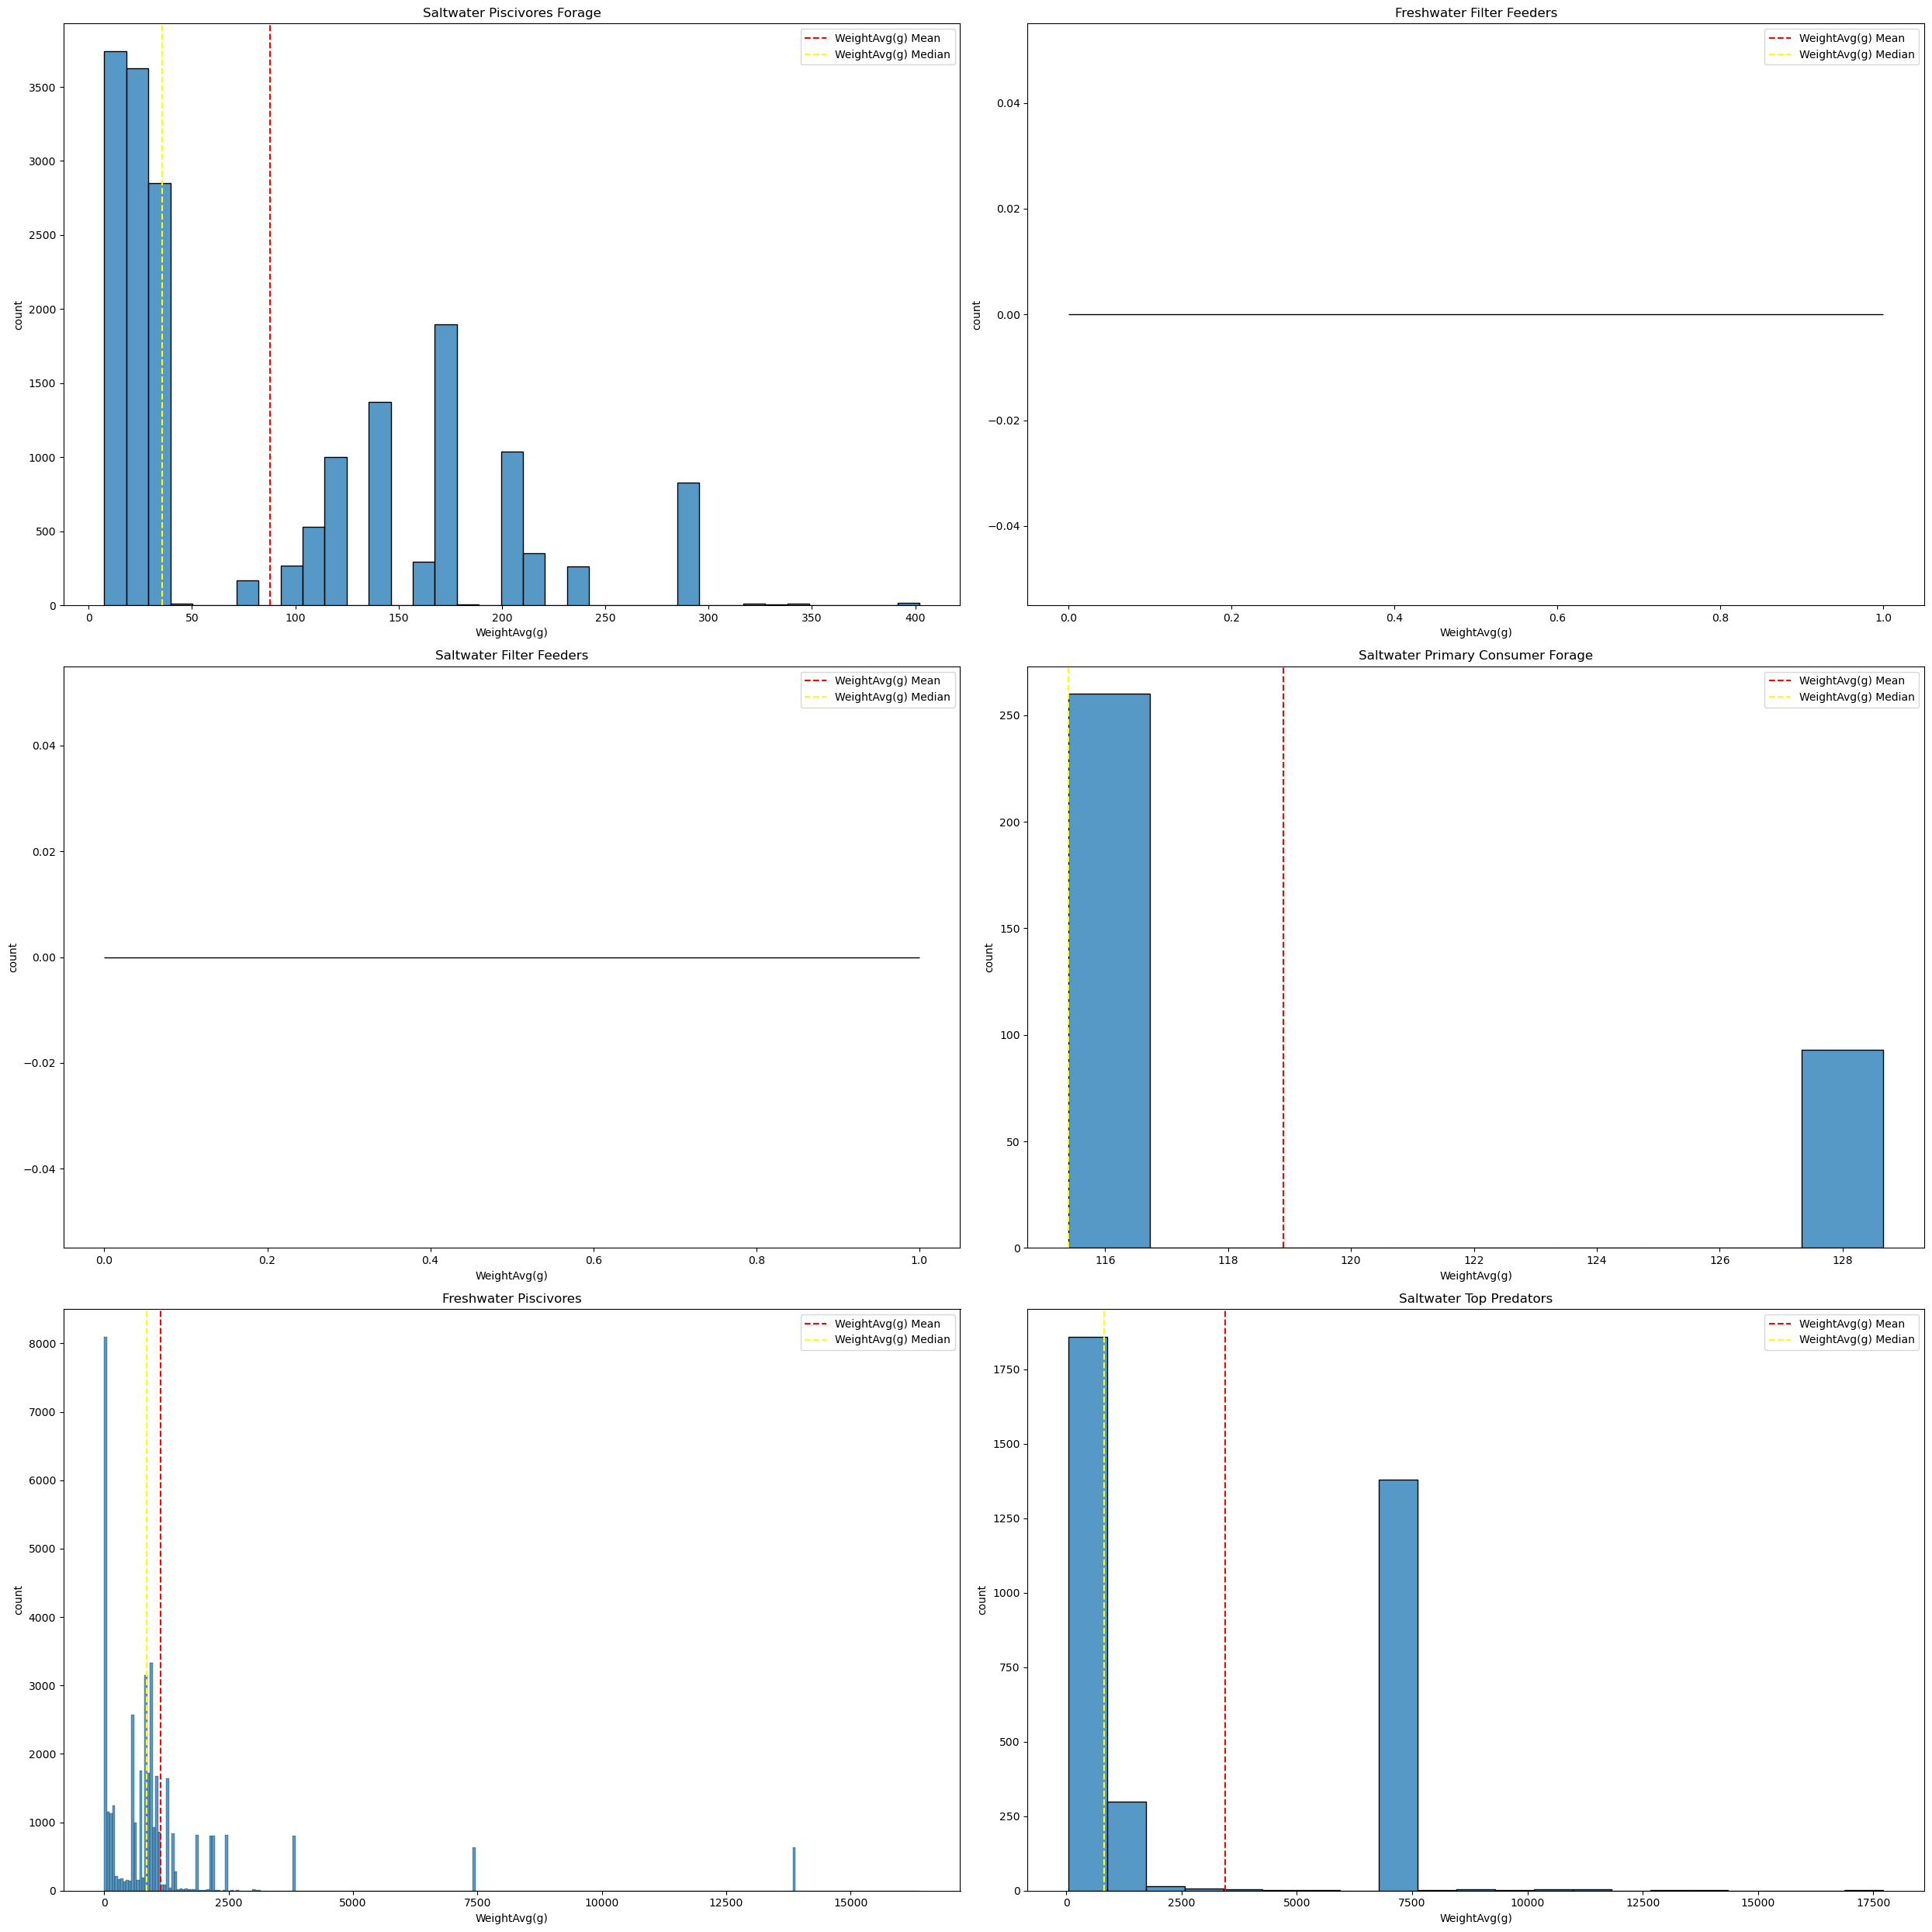

In [88]:
#Graph the mean & median to see which one is better to use to fill in null values

import seaborn as sns

weight_na_speciesgroups= ['Saltwater Piscivores Forage', 'Freshwater Filter Feeders',
       'Saltwater Filter Feeders', 'Saltwater Primary Consumer Forage',
       'Freshwater Piscivores', 'Saltwater Top Predators']


# Create the figure and axes
fig, ax = plt.subplots(3,2, figsize=(25,25))

# Plot the histograms by group
for i,n in enumerate(weight_na_speciesgroups):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df2.loc[df2['SpeciesGroup']== n], x="WeightAvg(g)")
    mean_values = df2.loc[df2['SpeciesGroup']== n]["WeightAvg(g)"].mean()
    plt.axvline(mean_values, color= "red", ls="--", label=f"{'WeightAvg(g)'} Mean")
    median_values = df2.loc[df2['SpeciesGroup']== n]["WeightAvg(g)"].median()
    plt.axvline(median_values, color="yellow", ls="--", label=f"{'WeightAvg(g)'} Median")
    plt.xlabel("WeightAvg(g)")
    plt.ylabel("count")
    plt.title(n)
    plt.legend()

# Add legend and labels
plt.tight_layout()
plt.show()

In [89]:
# since the median lies within more of the distribution of values, it is a better choise to use to fill in the nums
df2.groupby(['SpeciesGroup'])['WeightAvg(g)'].median()

SpeciesGroup
Freshwater Omnivores                   302.000000
Freshwater Omnivores Forage           1102.000000
Freshwater Piscivores                  847.000000
Freshwater Primary Consumer Forage       0.622500
Freshwater Top Predators               524.444444
Primary Consumers                             NaN
Saltwater Filter Feeders                      NaN
Saltwater Omnivores                     22.170588
Saltwater Piscivores                   200.000000
Saltwater Piscivores Forage             35.562500
Saltwater Primary Consumer Forage      115.400000
Saltwater Top Predators                815.000000
Name: WeightAvg(g), dtype: float64

In [90]:


weight_na_speciesgroups= ['Saltwater Piscivores Forage','Saltwater Primary Consumer Forage',
       'Freshwater Piscivores', 'Saltwater Top Predators']

for n in weight_na_speciesgroups:
    df2.loc[(df2['SpeciesGroup']== n )&(df2['WeightAvg(g)'].isna())]= df2.loc[(df2['SpeciesGroup']== n )&(df2['WeightAvg(g)'].isna())].fillna(df2.loc[df2['SpeciesGroup']== n]['WeightAvg(g)'].median())

check = df2['WeightAvg(g)'].isna().sum()
print(check)

25735


Since for the Primary Consumers, all of the values are null values, I decided to drop them as inputing 0 for the weight doesn't make sense.


In [91]:
df2.drop(df2[df2['SpeciesGroup']== 'Primary Consumers'].index, inplace=True)


In [92]:
#Now look and see if Saltwater Filter Feeders can be dropped...

df2.groupby(['SpeciesGroup'])['PCBResult(ng/g ww)'].sum()

SpeciesGroup
Freshwater Omnivores                       0.000000
Freshwater Omnivores Forage             6898.938695
Freshwater Piscivores                  26453.673957
Freshwater Primary Consumer Forage         0.000000
Freshwater Top Predators                1574.303305
Saltwater Filter Feeders                4878.300000
Saltwater Omnivores                      173.705364
Saltwater Piscivores                   58211.668932
Saltwater Piscivores Forage            24113.823754
Saltwater Primary Consumer Forage          0.000000
Saltwater Top Predators               102049.150000
Name: PCBResult(ng/g ww), dtype: float64

In [93]:
# Looking at the Composite Weight Column, that's where the weight value for this is stored
df2.loc[df2['SpeciesGroup']== 'Saltwater Filter Feeders','CompositeWeight(g)']

147075    550.51
147076    550.51
147077    550.51
147078    550.51
147079    550.51
           ...  
187816    553.37
187817    553.37
187818    553.37
187819    553.37
187820    553.37
Name: CompositeWeight(g), Length: 25720, dtype: float64

In [94]:
df2.loc[(df2['SpeciesGroup']== 'Saltwater Filter Feeders' )&(df2['WeightAvg(g)'].isna())]= df2.loc[(df2['SpeciesGroup']== 'Saltwater Filter Feeders' )&(df2['WeightAvg(g)'].isna())].fillna(df2.loc[df2['SpeciesGroup']== 'Saltwater Filter Feeders','CompositeWeight(g)'])

In [95]:
df2.isna().sum()

ProjectName                    0
CompositeID                    0
StationName                    0
StationCode                    0
Latitude                       0
Longitude                      0
GeometryShape                  0
EarliestDateSampled            0
CompositeType                  0
CommonName                     0
TissueName                     0
NumberFishperComp              7
SampleTypeCode                 0
CompositeReplicate             0
ResultReplicate                0
Analyte                        0
Unit                           0
Result                         0
LabSampleID                    0
OrganismGroup                  0
WeightAvg(g)               25730
TLMax(mm)                  25753
TLAvgLength(mm)            25753
CompSizeCheck              25753
SexSummary                     7
TissueResultRowID              0
CompositeLatitude              0
CompositeLongitude             0
OrganismID                     0
TotalCount                     7
ForkLength

In [96]:
df2.shape

(117754, 43)

In [97]:
col_drop = ['NumberFishperComp','CompSizeCheck','SexSummary','ForkLength','TotalCount']
df2.drop(columns = col_drop, inplace=True)
df2.shape

(117754, 38)

In [98]:
df2.isna().sum()

ProjectName                    0
CompositeID                    0
StationName                    0
StationCode                    0
Latitude                       0
Longitude                      0
GeometryShape                  0
EarliestDateSampled            0
CompositeType                  0
CommonName                     0
TissueName                     0
SampleTypeCode                 0
CompositeReplicate             0
ResultReplicate                0
Analyte                        0
Unit                           0
Result                         0
LabSampleID                    0
OrganismGroup                  0
WeightAvg(g)               25730
TLMax(mm)                  25753
TLAvgLength(mm)            25753
TissueResultRowID              0
CompositeLatitude              0
CompositeLongitude             0
OrganismID                     0
TotalLength(mm)            27065
OrganismWeight(g)          27124
Sex                            0
TissueID                       0
TissueWeig

In [99]:
species = ['Freshwater Filter Feeders','Freshwater Primary Consumer Forage','Freshwater Omnivores Forage','Freshwater Omnivores','Freshwater Piscivores','Freshwater Top Predators','Saltwater Filter Feeders','Saltwater Primary Consumer Forage','Saltwater Omnivores','Saltwater Piscivores Forage','Saltwater Piscivores','Saltwater Top Predators','Primary Consumers']
unit = ['TLMax(mm)','TLAvgLength(mm)','TotalLength(mm)','OrganismWeight(g)','TLMin(mm)']

for u in unit:
    unit_na = df2[df2[u].isna()]
    print(u, unit_na['SpeciesGroup'].value_counts())

TLMax(mm) SpeciesGroup
Saltwater Filter Feeders    25720
Saltwater Top Predators        19
Saltwater Piscivores           14
Name: count, dtype: int64
TLAvgLength(mm) SpeciesGroup
Saltwater Filter Feeders    25720
Saltwater Top Predators        19
Saltwater Piscivores           14
Name: count, dtype: int64
TotalLength(mm) SpeciesGroup
Saltwater Filter Feeders    25720
Saltwater Top Predators      1327
Saltwater Piscivores           18
Name: count, dtype: int64
OrganismWeight(g) SpeciesGroup
Saltwater Filter Feeders    25720
Saltwater Top Predators      1308
Saltwater Piscivores           96
Name: count, dtype: int64
TLMin(mm) SpeciesGroup
Saltwater Filter Feeders    25720
Saltwater Top Predators        19
Saltwater Piscivores           14
Name: count, dtype: int64


In [100]:
species_na = ['Saltwater Piscivores','Saltwater Top Predators','Saltwater Filter Feeders']


for s in species_na:
    for u in unit:
        mean=df2.loc[df2['SpeciesGroup']== s][u].mean()
        median=df2.loc[df2['SpeciesGroup']== s][u].median()
        print(f'{s},{u},mean:{mean},median:{median}')

Saltwater Piscivores,TLMax(mm),mean:273.5103379349116,median:275.0
Saltwater Piscivores,TLAvgLength(mm),mean:243.99187956774315,median:245.0
Saltwater Piscivores,TotalLength(mm),mean:243.9736332396126,median:235.0
Saltwater Piscivores,OrganismWeight(g),mean:256.33571419601935,median:170.0
Saltwater Piscivores,TLMin(mm),mean:221.5348241614092,median:201.0
Saltwater Top Predators,TLMax(mm),mean:769.5897646414887,median:452.0
Saltwater Top Predators,TLAvgLength(mm),mean:714.0123152709359,median:424.0
Saltwater Top Predators,TotalLength(mm),mean:515.9731457800511,median:433.0
Saltwater Top Predators,OrganismWeight(g),mean:1670.1910359408032,median:800.0
Saltwater Top Predators,TLMin(mm),mean:649.2082649151615,median:370.0
Saltwater Filter Feeders,TLMax(mm),mean:nan,median:nan
Saltwater Filter Feeders,TLAvgLength(mm),mean:nan,median:nan
Saltwater Filter Feeders,TotalLength(mm),mean:nan,median:nan
Saltwater Filter Feeders,OrganismWeight(g),mean:nan,median:nan
Saltwater Filter Feeders,TLMin(m

/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/anaconda3/envs/ml_env/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [101]:
#End up still having to drop Saltwater Filter Feeders sinces all its other unit values are null
df2.drop(df2[df2['SpeciesGroup']== 'Saltwater Filter Feeders'].index, inplace=True)

Plot the median and mean for Saltwater Piscivores and Saltwater Top Predators to see which value to use to fill in nulls

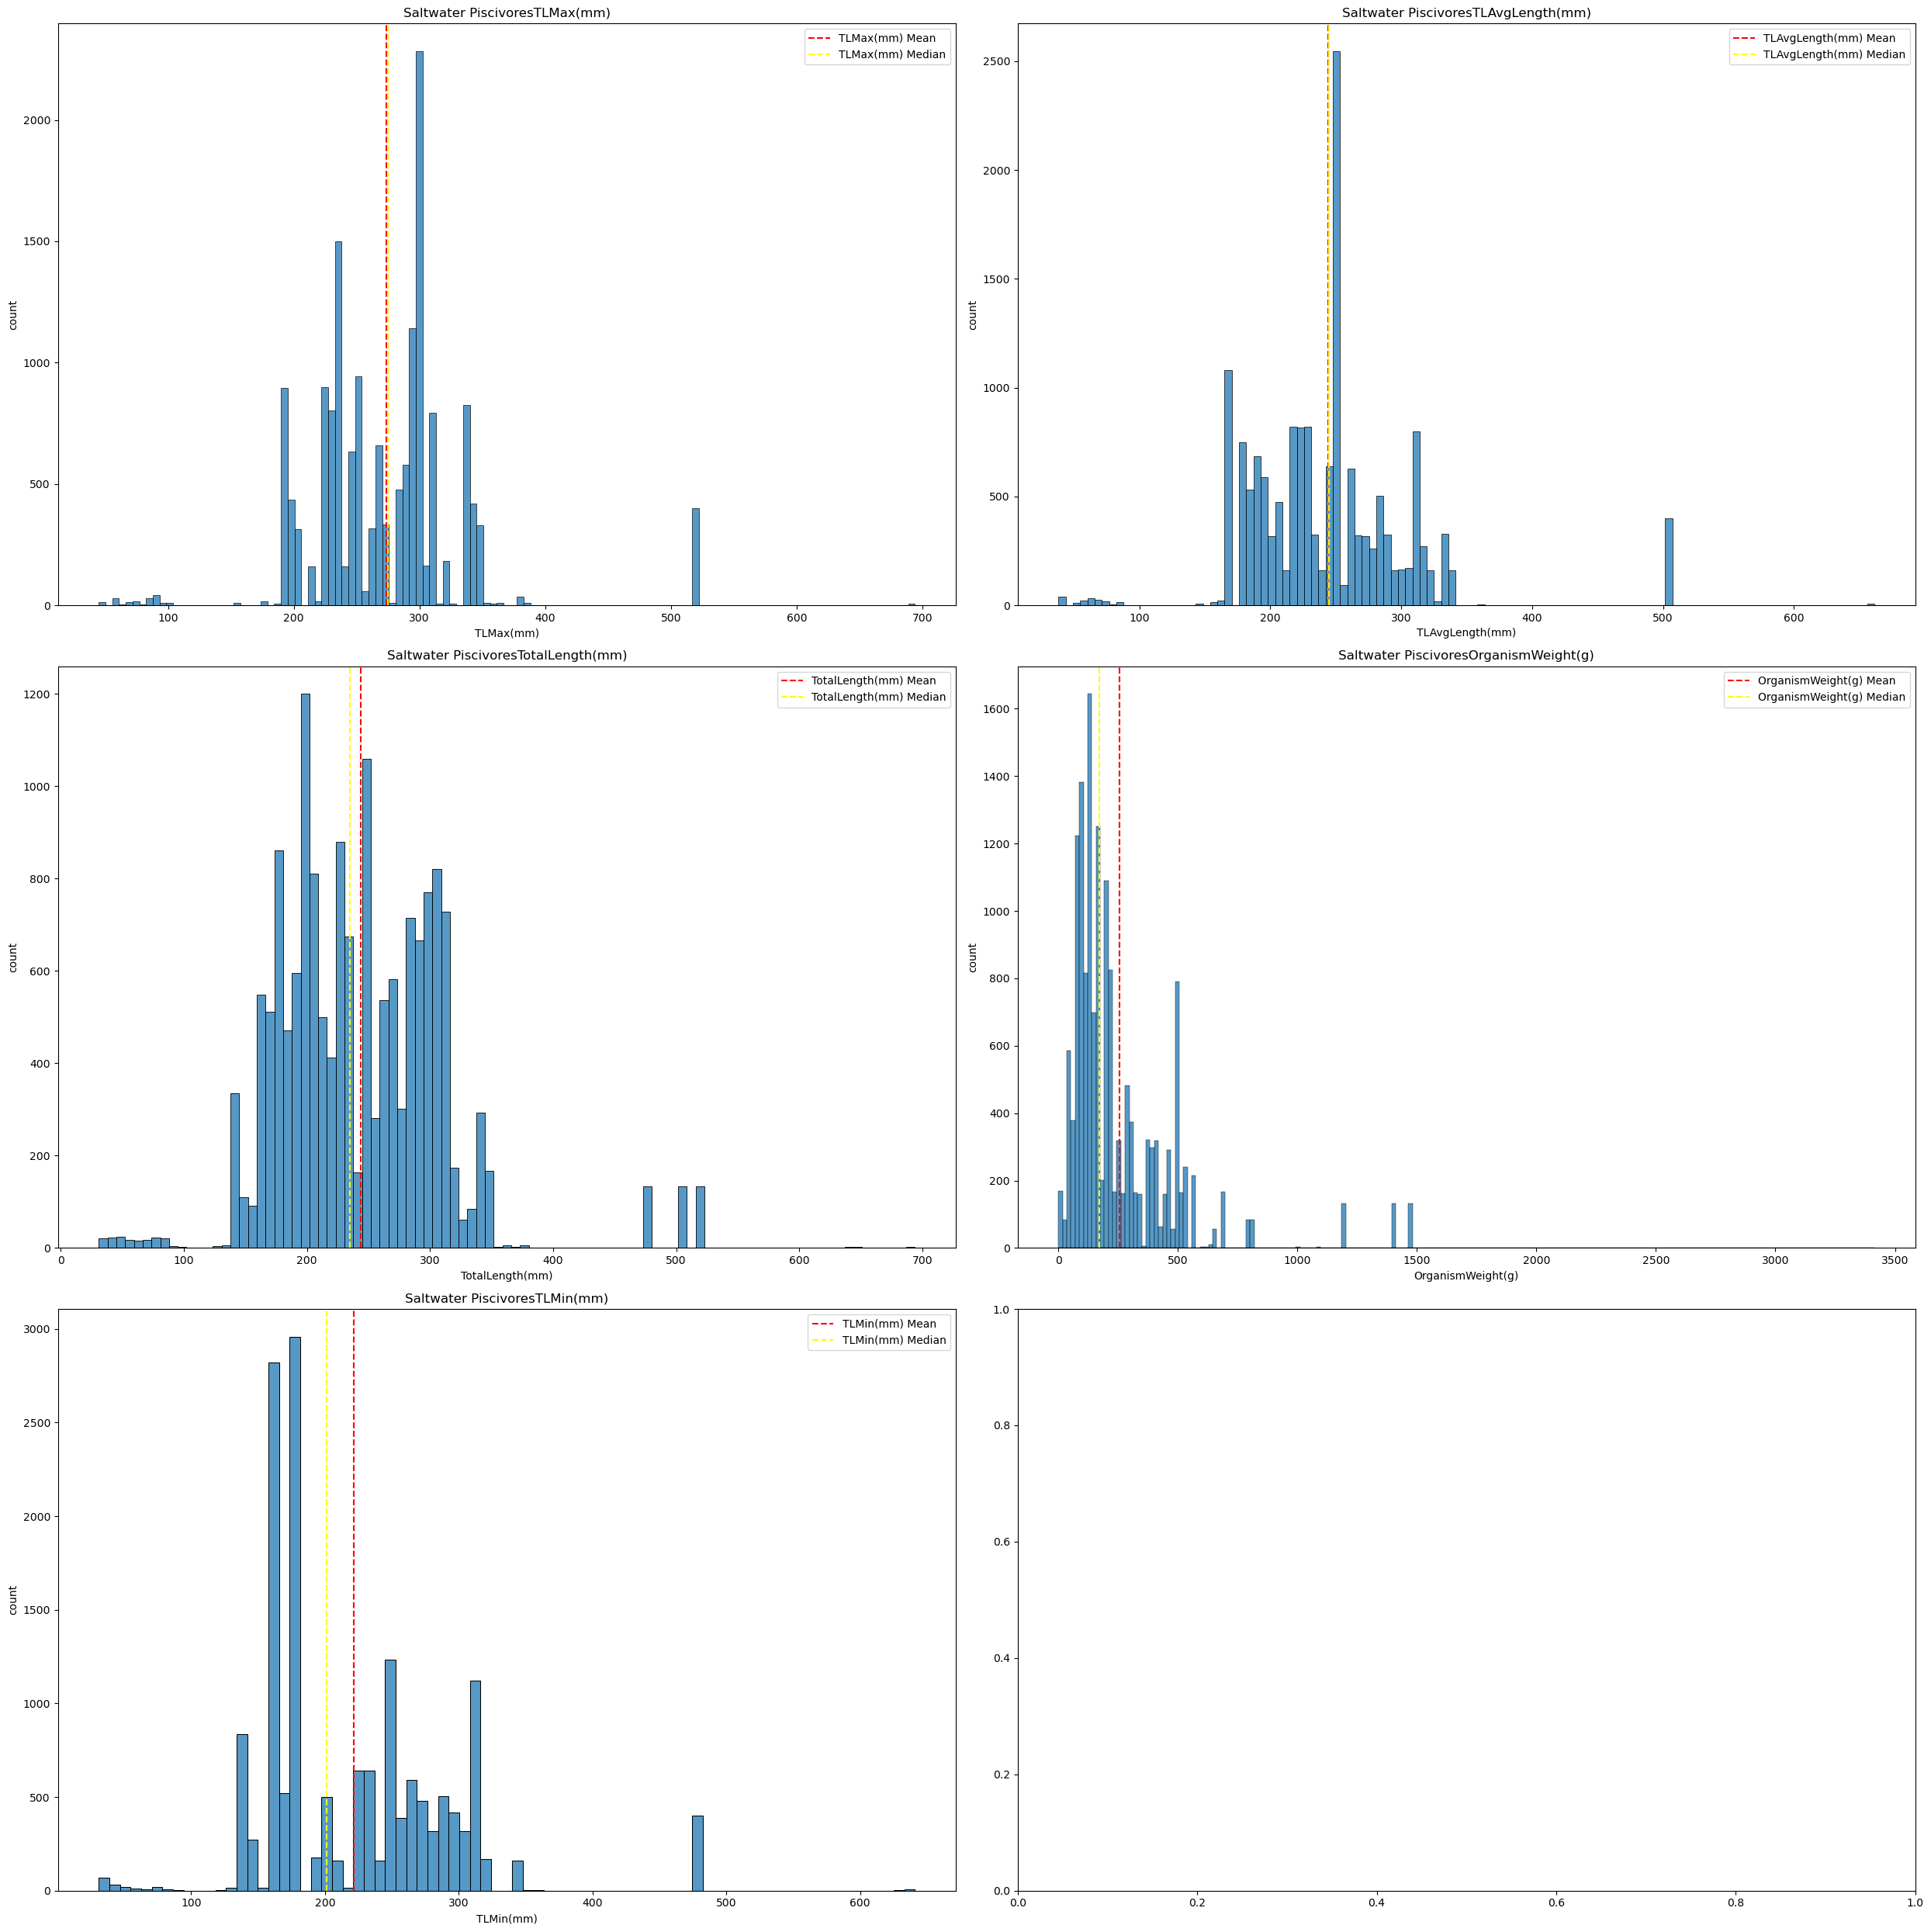

In [102]:
# Saltwater Piscivores
fig, ax = plt.subplots(3,2, figsize=(25,25))

# Plot the histograms by group
for i,u in enumerate(unit):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df2.loc[df2['SpeciesGroup']== 'Saltwater Piscivores'], x=u)
    mean_values = df2.loc[df2['SpeciesGroup']== 'Saltwater Piscivores'][u].mean()
    plt.axvline(mean_values, color= "red", ls="--", label=f"{u} Mean")
    median_values = df2.loc[df2['SpeciesGroup']== 'Saltwater Piscivores'][u].median()
    plt.axvline(median_values, color="yellow", ls="--", label=f"{u} Median")
    plt.xlabel(u)
    plt.ylabel("count")
    plt.title(f'Saltwater Piscivores{u}')
    plt.legend()

# Add legend and labels
plt.tight_layout()
plt.show()

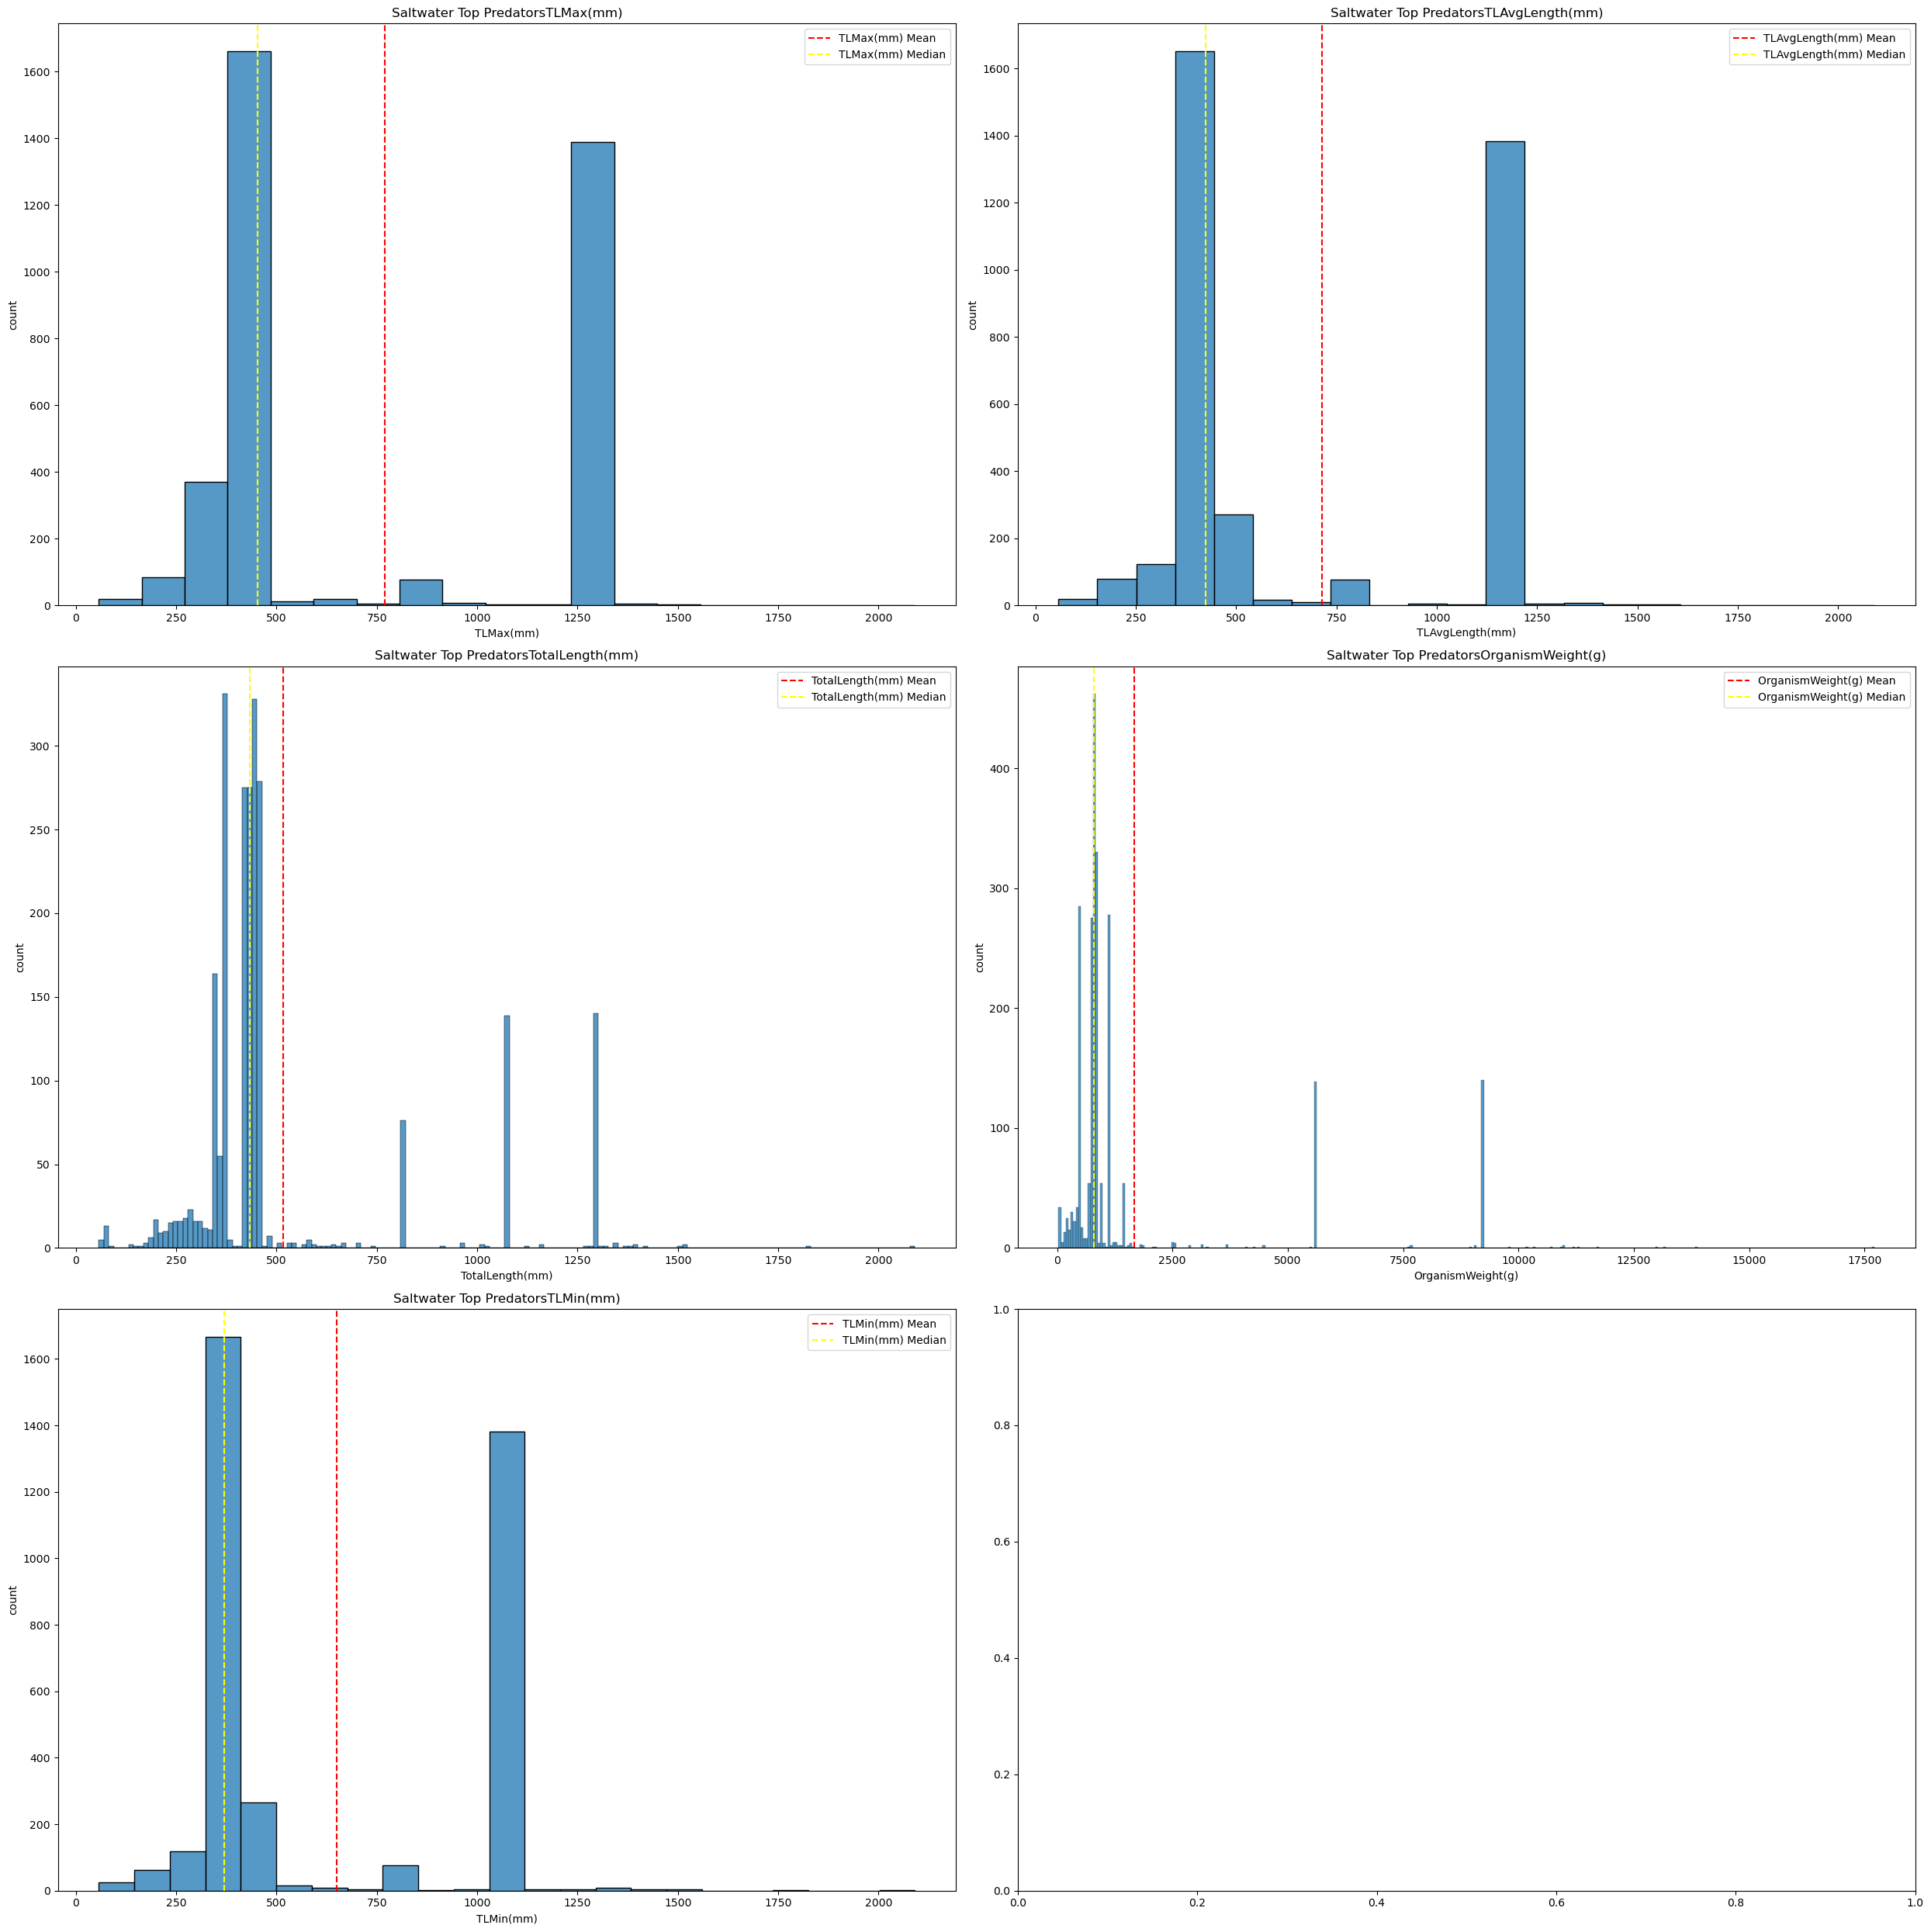

In [103]:
# Saltwater Top Predators
fig, ax = plt.subplots(3,2, figsize=(25,25))

# Plot the histograms by group
for i,u in enumerate(unit):
    plt.subplot(3,2,i+1)
    sns.histplot(data=df2.loc[df2['SpeciesGroup']== 'Saltwater Top Predators'], x=u)
    mean_values = df2.loc[df2['SpeciesGroup']== 'Saltwater Top Predators'][u].mean()
    plt.axvline(mean_values, color= "red", ls="--", label=f"{u} Mean")
    median_values = df2.loc[df2['SpeciesGroup']== 'Saltwater Top Predators'][u].median()
    plt.axvline(median_values, color="yellow", ls="--", label=f"{u} Median")
    plt.xlabel(u)
    plt.ylabel("count")
    plt.title(f'Saltwater Top Predators{u}')
    plt.legend()

# Add legend and labels
plt.tight_layout()
plt.show()

In [104]:
#fill in null values with median since it is closer to the distributions of values for both groups

for u in unit:
    for s in species_na:
        df2.loc[(df2['SpeciesGroup']== s)&(df2[u].isna())] = df2.loc[(df2['SpeciesGroup']== s)&(df2[u].isna())].fillna(df2.loc[df2['SpeciesGroup']== s][u].median())
        print(s,u, df2.loc[df2['SpeciesGroup']== s][u].isna().sum())

Saltwater Piscivores TLMax(mm) 0
Saltwater Top Predators TLMax(mm) 0
Saltwater Filter Feeders TLMax(mm) 0
Saltwater Piscivores TLAvgLength(mm) 0
Saltwater Top Predators TLAvgLength(mm) 0
Saltwater Filter Feeders TLAvgLength(mm) 0
Saltwater Piscivores TotalLength(mm) 0
Saltwater Top Predators TotalLength(mm) 0
Saltwater Filter Feeders TotalLength(mm) 0
Saltwater Piscivores OrganismWeight(g) 0
Saltwater Top Predators OrganismWeight(g) 0
Saltwater Filter Feeders OrganismWeight(g) 0
Saltwater Piscivores TLMin(mm) 0
Saltwater Top Predators TLMin(mm) 0
Saltwater Filter Feeders TLMin(mm) 0


In [105]:
df2.isna().sum()

ProjectName                   0
CompositeID                   0
StationName                   0
StationCode                   0
Latitude                      0
Longitude                     0
GeometryShape                 0
EarliestDateSampled           0
CompositeType                 0
CommonName                    0
TissueName                    0
SampleTypeCode                0
CompositeReplicate            0
ResultReplicate               0
Analyte                       0
Unit                          0
Result                        0
LabSampleID                   0
OrganismGroup                 0
WeightAvg(g)                  0
TLMax(mm)                     0
TLAvgLength(mm)               0
TissueResultRowID             0
CompositeLatitude             0
CompositeLongitude            0
OrganismID                    0
TotalLength(mm)               0
OrganismWeight(g)             0
Sex                           0
TissueID                      0
TissueWeight(g)               0
Composit

There are null values in the result columns from the "pivoting" that we did. It makes sense to fill it out with null values

In [106]:
Results_fillna = ['PCBResult(ng/g ww)','MercuryResult(ng/g ww)','PBDEResult(ng/g ww)']

for col in Results_fillna:
    df2[col].fillna(value=0)

In [107]:
df2.reset_index(drop=True, inplace=True) #reset columns to make it clean
df2.head() # last check

,ProjectName,CompositeID,StationName,StationCode,Latitude,Longitude,GeometryShape,EarliestDateSampled,CompositeType,CommonName,TissueName,SampleTypeCode,CompositeReplicate,ResultReplicate,Analyte,Unit,Result,LabSampleID,OrganismGroup,WeightAvg(g),TLMax(mm),TLAvgLength(mm),TissueResultRowID,CompositeLatitude,CompositeLongitude,OrganismID,TotalLength(mm),OrganismWeight(g),Sex,TissueID,TissueWeight(g),CompositeWeight(g),HomogonizedDate,TLMin(mm),PCBResult(ng/g ww),MercuryResult(ng/g ww),PBDEResult(ng/g ww),SpeciesGroup
0,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,439107A5-DF06-4F18-A3A1-DEFE91EA1B72,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
1,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,E59C2843-198F-4492-80BC-7261BB186EA1,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
2,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,7F351E75-BA55-4A6A-A717-7A5AB749BEEA,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
3,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,27CF3794-4FBD-455F-93FE-E60E7512813B,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage
4,City of Long Beach Colorado Lagoon TMDL Monito...,F1-190709,Composite of 3 sub areas within the Western Ar...,F1,33.771563,-118.133022,PointCent,07/09/2019,Normal,Top Smelt,whole organism,Composite,1.0,1.0,PCB,ng/g ww,0.0,570-1214-1,Fish,35.5625,10.6,10.6,08342AD5-F915-4687-8C21-C338F8AB629A,33.7716,-118.133,F1-190709,1.06,-88.0,NR,30083058,-88.0,-88.0,01/01/1950,10.6,0.0,35.5625,35.5625,Saltwater Piscivores Forage


### Export Cleaned Dataset for EDA

In [109]:
df2.to_csv('Tissue_dataset_2019_2023_fullset_cleaned.csv')